# Visualize functional groups 

In [259]:
## install.packages("reshape2")
## install.packages("ggplot2")

### 1) Load packages

In [260]:
library(reshape2)
library(ggplot2)

### 2) Load the guilds table and the original OTU table

In [1]:
guilds = read.delim("/Users/jessicahoch/Downloads/funguild_jh_guilds.txt")

In [2]:
its = read.delim("/Users/jessicahoch/Downloads/funguild_jh_its.txt")

### 3) Merge funguild data with OTU table 

In [249]:
merged  =merge(guilds, its, by="OTU_ID")

### 4) Sum occurances of each functional group 

In [192]:
collapsed = aggregate(. ~ Guild, data=merged, FUN=sum)

### 5) Set guilds as row names & remove guild information from data frame

In [193]:
row.names(collapsed)=collapsed$Guild

In [194]:
collaposed = collapsed[,-1]

### 6) Transpose dataframe 

In [195]:
fun=as.data.frame(t(collapsed))

### 7) Add metadata

In [196]:
fun$Veg_Type[grepl("MR", row.names(fun))] = "Mixed-veg"
fun$Veg_Type[grepl("SR", row.names(fun))] = "Sedum"

### 8) "Melt" data so each row contains the sum of functional group occurances in each sample 

In [197]:
DF = melt(fun, id=c("Veg_Type"))

Warning message:
“attributes are not identical across measure variables; they will be dropped”

### 9) Reassign functional groups 

In [199]:
DF$groups[grepl("-",DF$variable)] = "Unclassified"
DF$groups[grepl("NULL", DF$variable)] = "Unclassified"
DF$groups[grepl("Saprotroph", DF$variable)] = "Saprotroph"
DF$groups[grepl("Animal Endosymbiont", DF$variable)] = "Animal Endosymbiont"
DF$groups[grepl("Plant Pathogen", DF$variable)] = "Plant Pathogen"
DF$groups[grepl("Lichen", DF$variable)] = "Lichen"
DF$groups[grepl("Endophyte", DF$variable)] = "Endophyte"
DF$groups[grepl("Arbuscular Mycorrhizal" , DF$variable)] = "Arbuscular Mycorrhizal" 
DF$groups[grepl("Epiphyte" , DF$variable)] = "Epiphyte"
DF$groups[grepl("Ericoid Mycorrhizal" , DF$variable)] = "Ericoid Mycorrhizal" 
DF$groups[grepl("Orchid" , DF$variable)] = "Ericoid Mycorrhizal" 
DF$groups[grepl("Ectomycorrhizal" , DF$variable)] = "Ectomycorrhizal" 
DF$groups[grepl("Animal Pathogen" , DF$variable)] = "Animal Pathogen" 
DF$groups[grepl("Animal Parasite-Fungal Parasite" , DF$variable)] = "Animal Parasite-Fungal Parasite" 
DF$groups[grepl("Fungal Parasite" , DF$variable)] = "Fungal Parasite" 

### 10) Remove 'NA' values 

In [263]:
DF2=as.data.frame(subset(DF, DF$Veg_Type!="NA"))
head(DF2)

,Veg_Type,variable,value,groups
3,Mixed-veg,-,219,Unclassified
4,Mixed-veg,-,641,Unclassified
5,Mixed-veg,-,425,Unclassified
6,Mixed-veg,-,679,Unclassified
7,Mixed-veg,-,405,Unclassified
8,Mixed-veg,-,1123,Unclassified


### 11) Generate abundance plot

Warning message:
“Ignoring unknown parameters: stat”

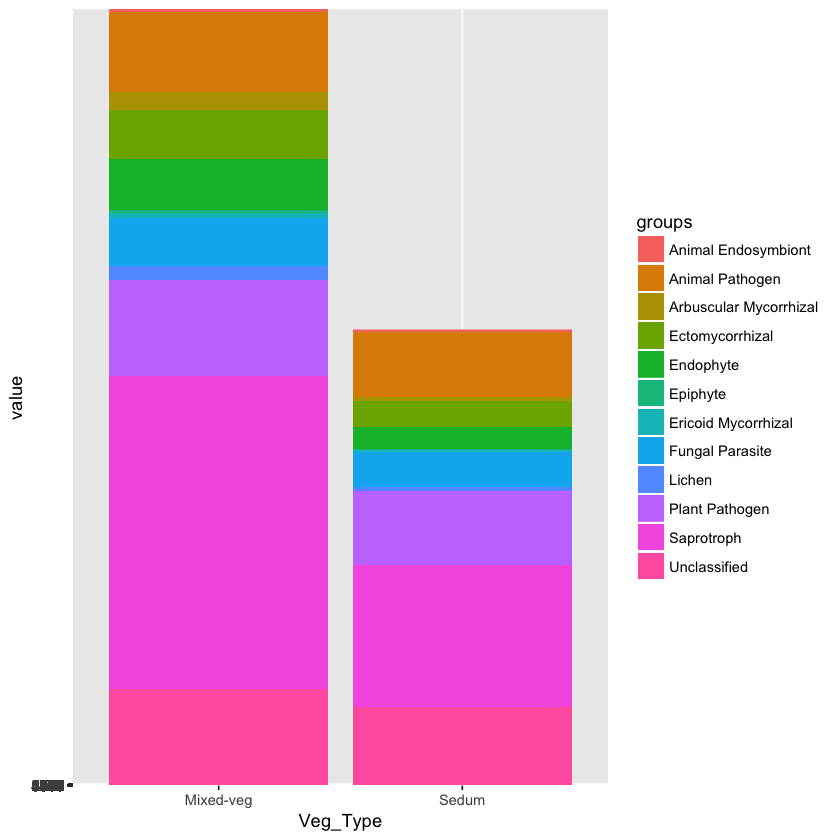

In [268]:
all_fung=ggplot(DF2, aes(x = Veg_Type, y = value, group=groups, fill=groups))+
  geom_col(stat="identity")

all_fung

![name](link)